In [2]:
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

from scipy.signal import convolve, fftconvolve

%load_ext autoreload
%autoreload 2

# device = 'cpu'
device = 'cuda'

np.random.seed(2)

In [3]:
def torch_fftconvolve(x, y):
    n = x.shape[0] + y.shape[0]
    parity = n % 2
    x_fft = torch.fft.rfft(x, n=n + parity, dim=0)
    y_fft = torch.fft.rfft(y, n=n + parity, dim=0)
    conv = torch.fft.irfft(x_fft * y_fft, dim=0)[:-(parity + 1)]
    return conv

def torch_convolve(x, y):
    conv = F.conv1d(x.T[None, ...], torch.flip(y, dims=[0]).T[None, ...], padding=y.shape[0] - 1)
    return conv

def sc_convolve(x, y):
    conv = convolve(x, y, mode='full', method='direct')
    return conv

def sc_fftconvolve(x, y):
    conv = fftconvolve(x, y, mode='full')
    return conv

def max_absdiff(x, y):
    return np.max(np.abs(x - y))

In [114]:
step = np.pi
x = torch.arange(0, 100, np.pi)
# values = torch.arange(0, 100, np.pi) + 2.3e-16
values = torch.arange(0, 1000000, np.pi) + 0.2

In [134]:
side = 'right'
rtol=1e-5
atol=1e-8

def idx_evenstep(step, values, floor=True, start=0, rtol=1e-5, atol=1e-8):
    scaled = values / step
    rounded = torch.round(scaled).float()
    isequal = torch.isclose(scaled, rounded, rtol=rtol, atol=atol).int()
    if isinstance(floor, bool):
        if floor:
            side = torch.floor(values / step).int()
        else:
            side = torch.ceil(values / step).int()
        idx = (isequal * rounded + (1 - isequal) * side).int()
    else:
        floor = torch.tensor(floor).int()
        floored = torch.floor(values / step).int()
        ceiled = torch.ceil(values / step).int()
        idx = (isequal * rounded + (1 - isequal) * (floor * floored + (1 - floor) * ceiled)).int()
    return idx

In [ ]:
def pad_dimensions(input, pad, side='right'):
    shape = input.shape + tuple([1] * pad)
    input = input.reshape(shape)
    return input

In [130]:
floor = [True, False]

In [132]:
torch.tensor(floor)

tensor([ True, False])

In [129]:
isinstance(floor, bool)

True

In [135]:
idx_evenstep(step, torch.tensor([2.]), floor=True)

tensor([0], dtype=torch.int32)

In [137]:
np.pi * 10

31.41592653589793

In [138]:
idx_evenstep(step, torch.tensor([2., 32.]), floor=[False, True])

tensor([ 1, 10], dtype=torch.int32)

In [ ]:
idx_evenstep(step, torch.tensor([1., ]), floor=False)

In [122]:
%timeit idx_evenstep(step, values.to('cpu'), floor=False)

481 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [123]:
%timeit idx_evenstep(step, values.to('cuda'), floor=False)

304 µs ± 1.76 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [116]:
%timeit idx_evenstep(step, values.to('cpu'), floor=False)

1.9 ms ± 34 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [117]:
%timeit idx_evenstep(step, values.to('cuda'), floor=False)

2.07 ms ± 32.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [64]:
absdif

tensor([7.3211e-17, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.7684e-07, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.5367e-07,
        0.0000e+00, 0.0000e+00, 9.5367e-07, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.9073e-06, 1.9073e-06,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.9073e-06, 1.9073e-06, 1.9073e-06,
        0.0000e+00, 0.0000e+00])

In [44]:
rounded, ceiled

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 array([ 1,  2,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 27, 28, 29, 30, 31]))

In [27]:
np.floor(x / step)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 10., 12.,
       13., 14., 14., 16., 17., 18., 19., 20., 21., 21., 23., 24., 25.,
       26., 27., 28., 29., 29., 31.])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       14., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       27., 27., 28., 29., 30., 31.])

In [11]:
def idx_evenstep(step, values, start=0):
     
     
     return arg_support0, arg_supportf

array([ 0.        ,  3.14159265,  6.28318531,  9.42477796, 12.56637061,
       15.70796327, 18.84955592, 21.99114858, 25.13274123, 28.27433388,
       31.41592654, 34.55751919, 37.69911184, 40.8407045 , 43.98229715,
       47.1238898 , 50.26548246, 53.40707511, 56.54866776, 59.69026042,
       62.83185307, 65.97344573, 69.11503838, 72.25663103, 75.39822369,
       78.53981634, 81.68140899, 84.82300165, 87.9645943 , 91.10618695,
       94.24777961, 97.38937226])

In [21]:
np.finfo(np.float64).eps

2.220446049250313e-16

In [22]:
np.searchsorted(x, x + 0.1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [24]:
x

array([ 0.        ,  3.14159265,  6.28318531,  9.42477796, 12.56637061,
       15.70796327, 18.84955592, 21.99114858, 25.13274123, 28.27433388,
       31.41592654, 34.55751919, 37.69911184, 40.8407045 , 43.98229715,
       47.1238898 , 50.26548246, 53.40707511, 56.54866776, 59.69026042,
       62.83185307, 65.97344573, 69.11503838, 72.25663103, 75.39822369,
       78.53981634, 81.68140899, 84.82300165, 87.9645943 , 91.10618695,
       94.24777961, 97.38937226])

In [23]:
np.searchsorted(x, x + 2.3e-16)

array([ 1,  2,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [7]:
x / np.pi

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31.])

In [27]:
conv = F.conv1d(x_torch.T[:, None, :], torch.flip(y_torch, dims=[0]).T[None, ...], padding=y.shape[0] - 1)

conv.shape

torch.Size([2, 1, 10099])

In [23]:
# N, M = 100000, 1 # fastest torch fftconvolve with cuda
N, M = 10000, 2 # similar between torch convolve and fftconvolve with cuda
# N, M = 1000, 1 # similar between torch convolve and fftconvolve with cuda
# N, M = 100, 1 # fastest torch normal convolve with cuda

# x = sc_convolve(np.random.randn(N, M), np.exp(-np.arange(-20, 20, 1)**2 / 200)[:, None])[:N]
x = np.random.randn(N, M)
y = np.exp(-np.arange(0, 100, 1) / 10)[:, None]
x_torch, y_torch = torch.from_numpy(x).to(device), torch.from_numpy(y).to(device)

In [14]:
sc_conv = sc_convolve(x, y)
sc_fftconv = sc_fftconvolve(x, y)
torch_conv = torch_convolve(x_torch, y_torch)[0].T
torch_fftconv = torch_fftconvolve(x_torch, y_torch)

In [15]:
print(sc_conv.shape, sc_fftconv.shape, torch_conv.shape, torch_fftconv.shape)
if device == 'cpu':
    print(max_absdiff(sc_conv, sc_fftconv), max_absdiff(sc_conv, torch_conv.numpy()), max_absdiff(sc_conv, torch_fftconv.numpy()))
else:
    print(max_absdiff(sc_conv, sc_fftconv), max_absdiff(sc_conv, torch_conv.cpu().numpy()), max_absdiff(sc_conv, torch_fftconv.cpu().numpy()))
# print(max_absdiff(sc_conv, sc_fftconv), max_absdiff(sc_conv, torch_conv.numpy()), max_absdiff(sc_conv, torch_fftconv.numpy()[:sc_conv.shape[0]]))

(10099, 1) (10099, 1) torch.Size([10099, 1]) torch.Size([10099, 1])
4.9960036108132044e-15 2.6645352591003757e-15 5.329070518200751e-15


In [16]:
# fig, ax = plt.subplots()
# ax.plot(sc_conv)
# ax.plot(sc_fftconv)
# ax.plot(torch_conv)
# ax.plot(torch_fftconv)

In [77]:
n = 10
start = time.time()
for i in range(n):
    a = sc_convolve(x, y)
end = time.time()
print((end - start) * 1000, (end - start) / n * 1000)

n = 500
start = time.time()
for i in range(n):
    a = sc_fftconvolve(x, y)
end = time.time()
print((end - start) * 1000, (end - start) / n * 1000)

2.84576416015625 0.284576416015625
120.26309967041016 0.2405261993408203


In [60]:
n = 50
start = time.time()
for i in range(n):
    a = torch_convolve(x_torch.to('cpu'), y_torch.to('cpu'))
end = time.time()
print((end - start) * 1000, (end - start) / n * 1000)

n = 1000
start = time.time()
for i in range(n):
    a = torch_fftconvolve(x_torch.to('cpu'), y_torch.to('cpu'))
end = time.time()
print((end - start) * 1000, (end - start) / n * 1000)

4.463672637939453 0.08927345275878906
79.46920394897461 0.07946920394897461


In [62]:
n = 5000
start = time.time()
for i in range(n):
    a = torch_convolve(x_torch.to('cuda'), y_torch.to('cuda'))
end = time.time()
print((end - start) * 1000, (end - start) / n * 1000)

n = 5000
start = time.time()
for i in range(n):
    a = torch_fftconvolve(x_torch.to('cuda'), y_torch.to('cuda'))
end = time.time()
print((end - start) * 1000, (end - start) / n * 1000)

317.5640106201172 0.06351280212402344
439.68677520751953 0.0879373550415039


torch.Size([1000, 1]) torch.Size([551, 1]) torch.Size([1100, 1])
4.263256414560601e-14


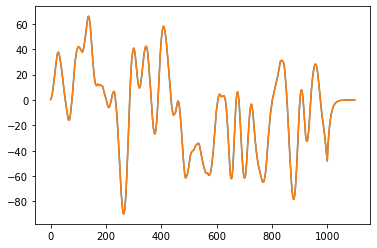

In [92]:
n = 1100

# x_fft = torch.fft.rfft(x_torch, n=n, dim=0)
# y_ker_fft = torch.fft.rfft(y_torch, n=n, dim=0)

# x_fft = torch.fft.rfft(x_torch, dim=0)
# x_fft = torch.fft.rfft(torch.cat((torch.zeros(100, 1), x_torch)), dim=0)
x_fft = torch.fft.rfft(torch.cat((x_torch, torch.zeros(100, 1))), dim=0)
# x_fft = torch.fft.rfft(torch.cat((torch.zeros(50, 1), x_torch, torch.zeros(50, 1))), dim=0)
y_ker_fft = torch.fft.rfft(torch.cat((y_torch, torch.zeros(1000, 1))), dim=0)
# y_ker_fft = torch.fft.rfft(torch.cat((torch.zeros(1000, 1), y_torch)), dim=0)
# y_ker_fft = torch.fft.rfft(torch.cat((torch.zeros(500, 1), y_torch, torch.zeros(500, 1))), dim=0)

# y_ker_fft = torch.fft.rfft(torch.cat((y_torch, torch.zeros(900, 1))), dim=0)
# y_ker_fft = torch.fft.rfft(torch.cat((torch.zeros(900, 1), y_torch)), dim=0)
# y_ker_fft = torch.fft.rfft(torch.cat((torch.zeros(450, 1), y_torch, torch.zeros(450, 1))), dim=0)

n = 0
x_fft = torch.fft.rfft(torch.cat((x_torch, torch.zeros(100 + n, 1))), dim=0)
y_ker_fft = torch.fft.rfft(torch.cat((y_torch, torch.zeros(1000 + n, 1))), dim=0)

torch_fftconv = torch.fft.irfft(y_ker_fft * x_fft, dim=0)

print(x_torch.shape, x_fft.shape, torch_fftconv.shape)
print(max_absdiff(sc_conv, torch_fftconv.numpy()[:1099]))


fig, ax = plt.subplots()
ax.plot(sc_conv)
ax.plot(torch_fftconv)
# ax.plot(sc_conv[-100:-50])
# ax.plot(torch_fftconv[-100:-50])

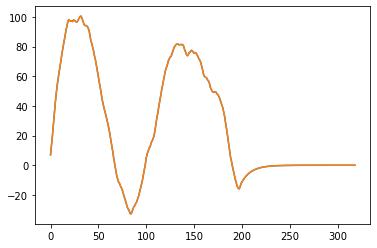

In [203]:
t = torch.arange(0, 200, dt)
y_true = 4. * torch.exp(-t_ker / tau)[:, None].double()
x = OUProcess(mu=0, sd=1, tau=50).sample(t, seed=0)
x = torch.from_numpy(x).double()

trim = False
conv_true = torch_convolve(x, y_true, trim=trim, dim=0)

# n = x.shape[0] + y.shape[0]
# n = 1881
# x_fft = torch.fft.rfft(x, n=n, dim=0)
# y_ker_fft = torch.fft.rfft(y, n=n, dim=0)
# fftconv = torch.fft.irfft(y_ker_fft * x_fft, dim=0)

sc_fftconv = fftconvolve(x, y_true.numpy(), mode='full')

# conv = F.conv1d(x.T[None, ...], y_true.T[None, ...], padding=119)
conv = F.conv1d(x.T[None, ...], torch.flip(y_true, dims=[0]).T[None, ...], padding=119)

conv.shape

plt.plot(sc_fftconv)
plt.plot(conv[0, 0, :].detach())
# plt.plot(fftconv.detach())

In [207]:
np.max((sc_fftconv[:, 0] - conv.numpy()[0, 0, :]))

3.552713678800501e-14

In [205]:
sc_fftconv.shape, conv.shape

((319, 1), torch.Size([1, 1, 319]))

9.992007221626409e-16


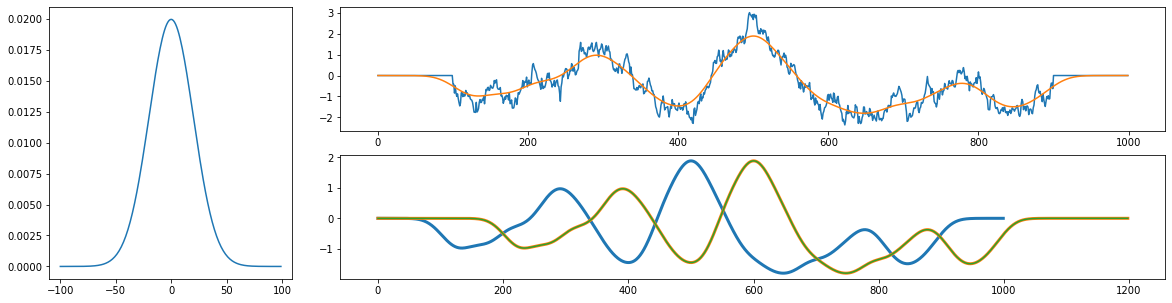

In [99]:
np.random.seed(SEED)

def normal(t, tau, A):
    return A / np.sqrt(2 * np.pi * tau**2) * np.exp(-t**2 / (2 * tau**2))

dt = 1

tau, A = 20, 1
t_ker = np.arange(-5*tau, 5*tau, 1)
kerfun = KernelFunNumpy(lambda t, tau: normal(t, tau, A), 
               basis_kwargs=dict(tau=[tau]), support=[-5*tau, 5*tau])

y_ker = kerfun.interpolate(t_ker)
arg_support0, arg_supportf = int(kerfun.support[0] / dt), int(kerfun.support[1] / dt)

ou = OUProcess(mu=0, sd=1, tau=50)
t = np.arange(0, 1000, dt)
arg0, argf = int(len(t) * 0.1), int(len(t) * 0.9)
# arg0, argf = int(len(t) * 0), int(len(t) * 1)
x = np.zeros(len(t))
x[arg0:argf] = ou.sample(t[arg0:argf], seed=SEED)[:, 0]

yfun = kerfun.convolve_continuous(t, x)
yfun2 = fftconvolve(x, y_ker, mode='full', axes=0)

trim = True
conv = torch_fftconvolve(torch.from_numpy(x), y_ker, trim=trim)

if trim:
    print(np.max(conv.numpy() - yfun))
else:
    print(np.max(conv.numpy() - yfun2))

fig = plt.figure(figsize=(20, 5), constrained_layout=False)
gs = fig.add_gridspec(2, 4)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1:])
ax3 = fig.add_subplot(gs[1, 1:])

ax1.plot(t_ker, kerfun.interpolate(t_ker))
ax2.plot(x)
ax2.plot(yfun)
ax3.plot(yfun, lw=3)
ax3.plot(yfun2, lw=3)
ax3.plot(conv)
# ax3.plot(t, y_torch)

In [75]:
float(conv[0]), yfun2[0]

(-0.020837892370273555, -0.020837892370273697)

In [78]:
conv[-2], yfun2[-1]

(tensor(-7.2813e-06, dtype=torch.float64), -7.281345059406401e-06)

In [92]:
conv.shape, yfun.shape

(torch.Size([1000]), (1000,))

In [91]:
conv.shape, yfun2.shape

(torch.Size([1000]), (1199,))

In [37]:
conv.numpy() - yfun2

ValueError: operands could not be broadcast together with shapes (1200,) (1199,) 

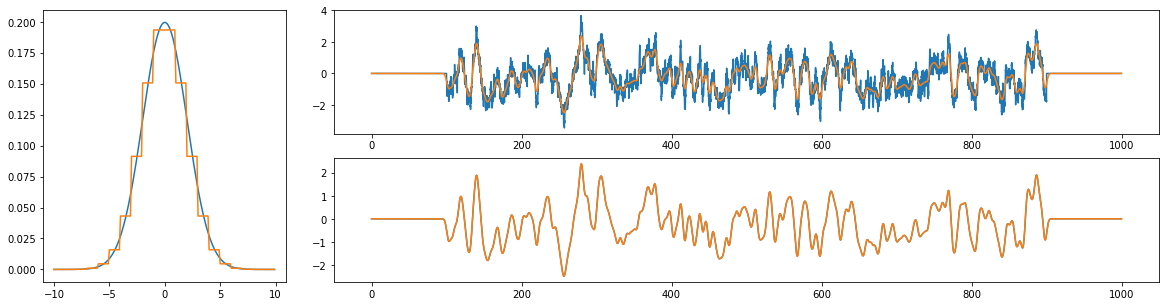

In [6]:
np.random.seed(SEED)

def normal(t, tau, A):
    return A / np.sqrt(2 * np.pi * tau**2) * np.exp(-t**2 / (2 * tau**2))

def exponential(t, tau, A):
    return A / tau * np.exp(-t / 2 * tau)

tau, A = 2, 1
t_ker = np.arange(-5*tau, 5*tau, .1)
kerfun = KernelFunNumpy(lambda t, tau: normal(t, tau, A), 
               basis_kwargs=dict(tau=[tau]), support=[-5*tau, 5*tau])
t_ker_rect = np.arange(-5*tau, 5*tau, 1)
kerrect = KernelRectNumpy(tbins=t_ker_rect, coefs=normal((t_ker_rect[:-1] + t_ker_rect[1:]) / 2, tau, A))

# tau, A, t0 = 2, 1, 100
# dt = .1
# support = np.array([0, 5*tau]) + t0
# t_ker = np.arange(0, 5*tau, dt) + t0
# kerfun = KernelFunNumpy(lambda t, tau, t0: exponential(t - t0, tau, A), 
#                basis_kwargs=dict(tau=[tau], t0=[t0]), support=support)
# t_ker_rect = np.arange(0, 5*tau, 1) + t0
# kerrect = KernelRectNumpy(tbins=t_ker_rect, coefs=exponential((t_ker_rect[:-1] + t_ker_rect[1:]) / 2 - t0, tau, A))


y_ker = kerfun.interpolate(t_ker)
arg_support0 = int(kerfun.support[0] / dt)

ou = OUProcess(mu=0, sd=1, tau=5)
t = np.arange(0, 1000, dt)
arg0, argf = int(len(t) * 0.1), int(len(t) * 0.9)
x = np.zeros(len(t))
x[arg0:argf] = ou.sample(t[arg0:argf], seed=SEED)[:, 0]

yfun = kerfun.convolve_continuous(t, x)
yrect = kerrect.convolve_continuous(t, x)

# y_ker_fft = torch.fft.rfft(torch.from_numpy(y_ker), n=y.shape[0], dim=0)
# x_fft = torch.fft.rfft(torch.from_numpy(x), n=y.shape[0], dim=0)
# y_torch = torch.fft.irfft(y_ker_fft * x_fft, dim=0)

x_fft = torch.fft.rfft(torch.from_numpy(x), dim=0)

npad = x.shape[0] - y_ker.shape[0]
if npad % 2 == 0:
#     _y = torch.cat((torch.zeros(npad // 2), torch.from_numpy(y_ker), torch.zeros(npad // 2)), dim=0)
    _y = torch.cat((torch.from_numpy(y_ker), torch.zeros(npad)), dim=0)
#     _y = torch.fft.rfft(torch.from_numpy(y_ker), n=x.shape[0], dim=0)
#     pass
y_ker_fft = torch.fft.rfft(_y, dim=0)

# y_ker_fft = torch.fft.rfft(torch.cat((torch.from_numpy(y_ker), torch.zeros(x.shape[0] - y_ker.shape[0]))), dim=0)
# y_ker_fft = torch.fft.rfft(torch.from_numpy(y_ker), n=x.shape[0], dim=0)

# y_ker_fft = torch.fft.rfft(torch.cat((torch.zeros(x.shape[0] - y_ker.shape[0]), torch.from_numpy(y_ker))), dim=0)
# y_ker_fft = torch.fft.rfft(torch.cat((torch.from_numpy(y_ker), torch.zeros(x.shape[0] - y_ker.shape[0]))), dim=0)

y_torch = torch.fft.irfft(y_ker_fft * x_fft, dim=0) * .1
conv = torch.zeros(x.shape)
if arg_support0 >= 0:
#     conv[:arg_support0] = y_torch[-arg_support0:, ...]
    conv[arg_support0:] = y_torch[:x.shape[0] - arg_support0]
elif arg_support0 < 0:
    conv[:arg_support0] = y_torch[-arg_support0:, ...]

fig = plt.figure(figsize=(20, 5), constrained_layout=False)
gs = fig.add_gridspec(2, 4)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1:])
ax3 = fig.add_subplot(gs[1, 1:])

ax1.plot(t_ker, kerfun.interpolate(t_ker))
ax1.plot(t_ker, kerrect.interpolate(t_ker))
ax2.plot(t, x)
ax2.plot(t, yfun)
ax3.plot(t, yfun)
# ax3.plot(t, yrect)
ax3.plot(t, conv)
# ax3.plot(t, y_torch)

In [225]:
y_torch.shape

torch.Size([10000])

In [173]:
x_fft.shape, y_ker_fft.shape

(torch.Size([5001]), torch.Size([2501]))

In [ ]:
5001

In [166]:
x.shape

(10000,)

In [162]:
y_ker_fft = torch.fft.rfft(torch.from_numpy(y_ker), dim=0)
y_ker2 = torch.fft.irfft(y_ker_fft, n=x.shape[0], dim=0)
# y_ker_fft = torch.fft.rfft(torch.cat((torch.zeros(x.shape[0] - y_ker.shape[0]), torch.from_numpy(y_ker))), dim=0)

In [163]:
# forward
# if even s // 2 + 1
# else (s + 1) //2

# inverse
# if input is even (s - 1)  * 2
# else (s - 1)  * 2

In [164]:
y_ker.shape, y_ker_fft.shape, y_ker2.shape

((200,), torch.Size([101]), torch.Size([10000]))

In [115]:
x.shape, y_ker.shape, y_ker_fft.shape, x_fft.shape, y_torch.shape, y.shape

((10000,),
 (200,),
 torch.Size([5001]),
 torch.Size([5001]),
 torch.Size([10000]),
 (10000,))

In [19]:
y.shape

(2999, 1)